# Lesson 11: Practical example

Here we try to combine all previous lessons to analyse data in practice. 
There are also new things such as cleaning raw data.

## Import libraries

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Load data

In [35]:
raw_data = pd.read_csv("1.04.Real_life_example.csv")

In [36]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [37]:
# We want to find an average price of a used car. We will need the columns: Brand, Mileage, EngineV, Year. 

## Preprocessing

### Exploring the descriptive statistics of the variables

In [38]:
# We need to see the statistics of our raw data. 

raw_data.describe()                   # This describes only numerical variables.
raw_data.describe(include = "all")      # In this way we include also cathegorical data to analyse them.

# It appears these data are not clean. For example, different counts for different columns.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Removing variables that are not useful and not nedded

In [39]:
data = raw_data.drop(["Model"], axis=1)  # In this way I remove the column "Model", 
                                         # which is not needed for data analysis. ("axis=1" defines a column)
    
data.describe(include = "all")           # It describes now all variables without "Model".

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing variables

In [40]:
data.isnull()              # This shows the table with missing data. 
                           # "True" value in the cell means that there is no data provided there.
    
data.isnull().sum()        # This sums all missing values in a given column.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [41]:
# There is a rule that for big data one can remove up to 5% of values. 
# In this case missing values constitute less than 5% of all values and we can remove them.

data_no_mv = data.dropna(axis=0)    # Here we remove missing values in rows. 
data_no_mv.describe(include="all")

# One sign that this works is that the values increase from min to max.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDF's (probability distribution functions)

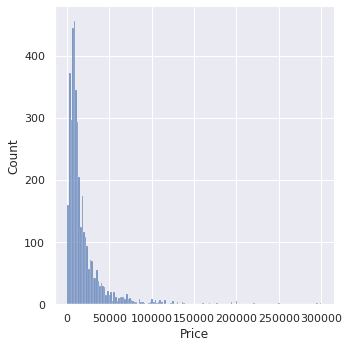

In [42]:
sns.displot(data_no_mv["Price"])       # This is PDF for te column "Price". 
                                       # Note that in the older versions we could use sns.distplot().

Note that this is exponential distribution and not the Gaussian one. This will be a problem for linear regression. We can also see the outliers (values at abnormal distance). There is also a long tail and linear regression will be trying to lead the line close to this values, which certainly will not be reliable.

To deal with outliers we remove 1% of observations.

### Dealing with outliers

In [43]:
# To remove 1% of observations we use the quantile method: DataFrame.quantile(0.99).

q = data_no_mv["Price"].quantile(0.99)         # This gives a number, which is 1% of highest prices.
data_1 = data_no_mv[data_no_mv["Price"]<q]    # Here we want all data that are below q.

data_1.describe(include = "all")

# Note that now max price is smaller than in "data_no_mv" table.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


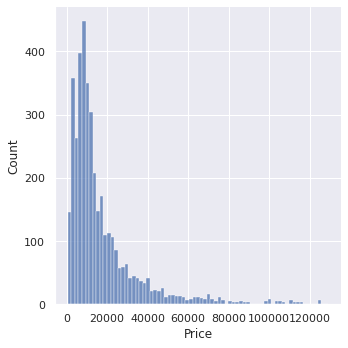

In [44]:
sns.displot(data_1["Price"])           # Now we get less outliers in the tail, but the distribution is similar.

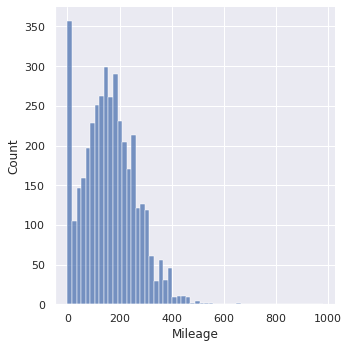

In [45]:
# Note that we have the same problem with other variables such as "Mileage".

sns.displot(data_no_mv["Mileage"])   

# And we do the same things.

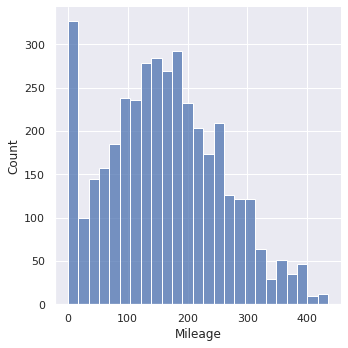

In [46]:
q = data_1["Mileage"].quantile(0.99)         # This gives a number, which is 1% of highest prices.
data_2 = data_1[data_1["Mileage"]<q]    # Here we want all data that are below q.

sns.displot(data_2["Mileage"]) 


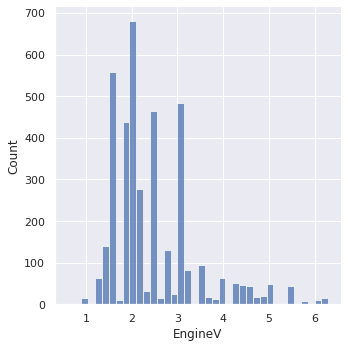

In [47]:
# Now we look at the EngineV (engine volume). 

#We see that the highest values are unphysical. 
# So we remove them and keep only typical ones (according to Wikipedia the typical values are lower than 6.5).

data_3 = data_2[data_2["EngineV"]<6.5]     # Here we want all data that are below q.

sns.displot(data_3["EngineV"]) 

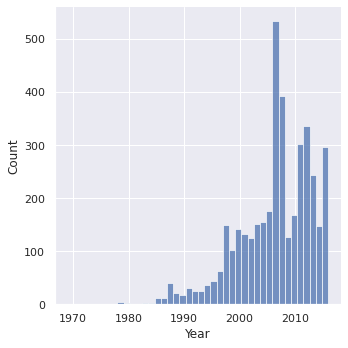

In [48]:
# Now we look at the Year. 

sns.displot(data_no_mv["Year"]) 

# Here the problem is with smaller values.

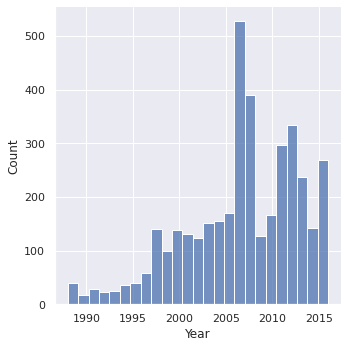

In [49]:
q = data_3["Year"].quantile(0.01)         # This gives a number, which is 1% of the lowest years.
data_4 = data_3[data_3["Year"]>q]         # Here we want all data that are above q.

# Note also that I was using "data_3" table, which was made of "data_2", which was made of "data_1"

sns.displot(data_4["Year"]) 

### Redefining the cleaned values.

In [61]:
data_cleaned = data_4.reset_index(drop=True)   
# We redefine the cleaned data to forget about values that were excluded and to reset the index.

data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

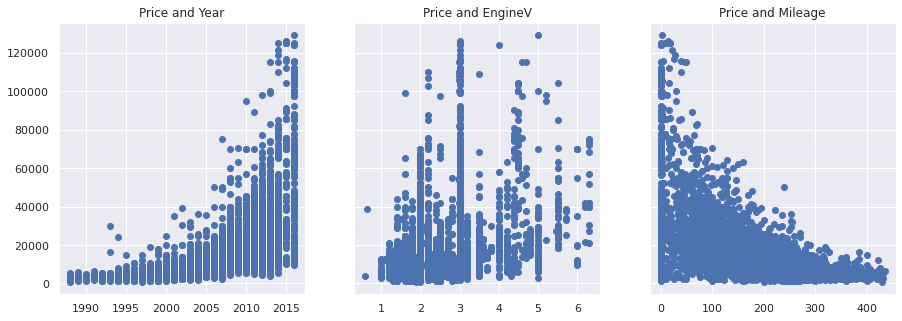

In [62]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,5))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("Price and Mileage")

plt.show()

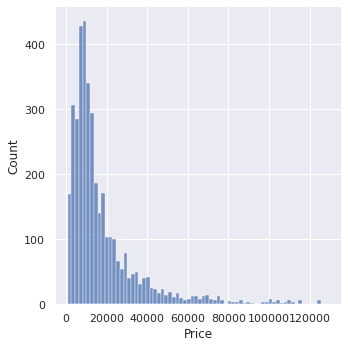

In [63]:
sns.displot(data_cleaned["Price"]) # This function displays the distribution of Prices.

# Note that the distribution is not normal (or Gaussian) and thus we cannot make a linear analysis. To apply
# the linear analysis we transform the values for Prices into the log of them.

### Relaxing assumptions

In [64]:
log_price = np.log(data_cleaned["Price"]) # Here we make log of prices using the function np.log().
data_cleaned["log_price"] = log_price     # And we add these values as an extra column to our dataset.
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


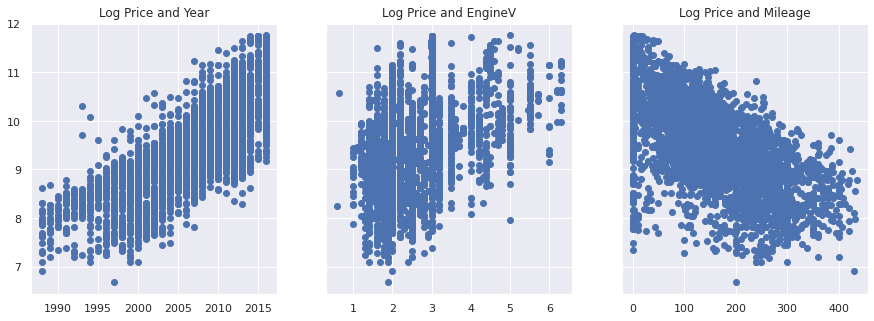

In [65]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,5))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax3.set_title("Log Price and Mileage")

plt.show()

# Now we see that the data have a linear tendency and we can analyse them by linear regression.


In [66]:
data_cleaned = data_cleaned.drop(["Price"], axis=1) # Because we no longer need the column "Price" we can 
                                                      # safely remove it.
    
# Next we should check other assumptions, but they are satisfied.

In [60]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### Multicollinearity

In [68]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [69]:
# Now we want to check how much some columns are correlated. Unfortunatly, sklearn does not have a simple 
# in-built method to do it, so we need to go to statsmodels to check it. 

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# We imported vif method from models of statistics.

variables = data_cleaned[["Mileage", "Year", "EngineV"]]
# We define functions that we want to check for multiple collinearity.

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
# This part is a part of syntax of vif.

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [72]:
# Vif belons to [1;+\infty); if vif=1 then no multicollinearity; vif between 1 and 5 are okay, and above 5 
# are unaccepteble (but this milit can be extended to up to 10, there is no clear consensus).

# In our case Year is definitely correlated too much with other variables. So we remove it from our dataset.

In [73]:
data_no_multicollinearity = data_cleaned.drop(["Year"], axis =1)

### Create dummy variables

In [74]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [75]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearange a bit

In [77]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [78]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
# The "log_price" was moved to the first column.

In [80]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear regregression model

### Inputs and outputs (targets)

In [81]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"],axis=1)

### Scale the data

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [83]:
inputs_scaled = scaler.transform(inputs)
# The data are scaled. But note we usually do not scale the dummies.

### Train-Test Split

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression 

In [86]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [87]:
y_hat = reg.predict(x_train)

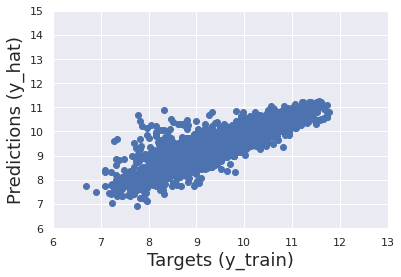

In [88]:
# Scatter plot
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,15)

plt.show()

# In an ideal scenario all points should line along one line. But it is not bad.

Text(0.5, 1.0, 'Residulas PDF')

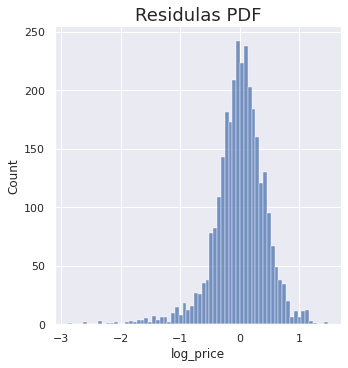

In [90]:
# Residual plot
sns.displot(y_train - y_hat)
plt.title("Residulas PDF", size=18)

In [91]:
# This looks like a normal distribution as we would expect (the errors are normally distributted). 
# However, we see there is a long tail on the left side, which means that these predictions are much higher
# than the mean and overestimated.

In [92]:
# R^2
reg.score(x_train, y_train)

0.744996578792662

In [93]:
# Because the above result is 0.744, meaning that it expalins around 75% variability, which is quite good.
# But it can be improved (probably by removing the long tail from the left).

### Finding the weights and bias

In [94]:
reg.intercept_

9.415239458021299

In [95]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [97]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [98]:
# This model is far from being interpretable.
# But: because for positive Weights the price increases (like for the EngineV: the larger the volume of 
# the engine, the higher the price of the car).

In [99]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [100]:
# Because we do not see Audi in among the brand cathegories (Audi was dropped), Audi is the benchmark 
# for other brands: this is how we assess the influence of dummies.
# Then a positive weight (as in case of Mercedes) means that the corresponding price is higher from 
# the bechmark brand (Audi). A negative weight means that Audi is more expensive than the tested brand.
# But if the values are close to zero (as in case of Mercedes) we cannot be sure if Mercedes is indeed 
# more expensive than Audi.

# In general if the absolute value of the weight is larger then this weight becomes more reliable.

## Testing

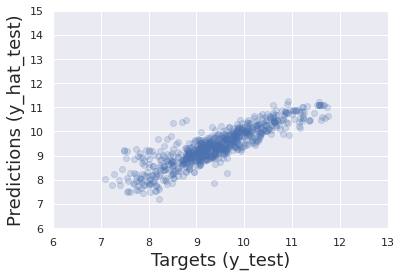

In [102]:
y_hat_test = reg.predict(x_test)

# Scatter plot
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,15)

plt.show()


In [104]:
# The plot looks good (45 degrees line would nicely fit the data). We also see that for higher prices
# the concentration of points is better than for lower prices, so our model is good for expensive cars.

# By using the parameter "alpha=0.2" we could see the saturation of colour, which in turn reflects 
# the concentration of points.

In [105]:
df_pf = pd.DataFrame(y_hat_test, columns = ["Predictions"])
df_pf.head()

,Predictions
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


In [106]:
# But remeber these are logs of prices. To reproduce prices let us take exponents og logs.

In [107]:
df1_pf = pd.DataFrame(np.exp(y_hat_test), columns = ["Predictions"])
df1_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [109]:
df1_pf["Target"] = np.exp(y_test)
df1_pf.head()
# Note that we have many NaNs, so something does not work. It means that Pandas tried to match the tested y's
# by their indexes which are shuffled. 

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [110]:
# We want to force the program to forget about the indexes. And we can do it be resetting the index:

In [115]:
y_test = y_test.reset_index(drop=True)
y_test.head()

# Now all is good.

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [116]:
df1_pf["Target"] = np.exp(y_test)
df1_pf.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [122]:
# We have Predictions and Targets and we want to compare them.

df1_pf["Residuals"] = df1_pf["Target"] - df1_pf["Predictions"]
df1_pf["Difference%"] = np.absolute(df1_pf["Residuals"]/df1_pf["Target"] *100)
df1_pf.head()

,Predictions,Target,Residuals,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [123]:
df1_pf.describe()

,Predictions,Target,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [126]:
pd.options.display.max_rows = 999  # We choose how many rows we want to see.
pd.set_option("display.float_format", lambda x: "%.2f" % x)  # Setting the form to 2 digits after the comma.
df1_pf.sort_values(by=["Difference%"]) # Sorting with ascending order.

,Predictions,Target,Residuals,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


In [ ]:
# If we look at the bottom of the table we will see there are a few cases for which predictions are 
# dramatically different from their target values. And for these rows our model probably misses some 
# information and thus it simply does not work. These rows are for rather small prices, so they are at
# the extreme for the used cars. It may be that these cars are after the accidents and this information is 
# not included in the raw data, so cannot be appriopriately modeled. 